In [93]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [95]:
df_soja = pd.read_csv("/content/drive/MyDrive/datosTP1/datasetSoja.csv")

En todos los gráficos uso verde o escalas de verde porque me parece que representa bien al usd y a la planta de soja.

In [96]:
df_soja

,Id,Fecha,Open,High,Low,Last,Cierre,Aj.Dif.,Mon.,OI.Vol.,OI.Dif.,Vol.Ope.,Unidad,DolarB.N.,DolarItau.,Dif.Sem
0,1,05/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,221.0,13.0,D,0,0,0,TONS,2.92,2.905,-221.0
1,2,06/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,221.0,0.0,D,0,0,0,TONS,2.88,2.87,-221.0
2,3,07/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,219.0,-2.0,D,0,0,0,TONS,2.865,2.882,-219.0
3,4,08/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,220.0,1.0,D,0,0,0,TONS,2.887,2.884,-220.0
4,5,09/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,220.0,0.0,D,0,0,0,TONS,2.892,2.9,-220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,3871,23/09/2019 12:00:00 a.m.,0.0,0.0,0.0,0.0,238.0,0.0,D,231900,3400,0,TONS,"56,92",57,4.0
3871,3872,24/09/2019 12:00:00 a.m.,0.0,0.0,0.0,0.0,238.0,0.0,D,233800,1900,0,TONS,"56,87","56,98",2.0
3872,3873,25/09/2019 12:00:00 a.m.,0.0,0.0,0.0,0.0,237.0,-1.0,D,199000,-34800,0,TONS,"57,05","57,05",4.0
3873,3874,26/09/2019 12:00:00 a.m.,0.0,0.0,0.0,0.0,236.0,-1.0,D,193200,-5800,0,TONS,"57,21","57,22",6.0


In [97]:
df_soja.columns = df_soja.columns.str.lower()

El formato de la fecha del .csv no es el mismo que el de datetime, así que lo especifíco.

In [98]:
df_soja["fecha"] = df_soja["fecha"].map( lambda x: datetime.strptime(x.split()[0], "%d/%m/%Y") )

df_soja["mes"] = df_soja.fecha.dt.month
df_soja["anio"] = df_soja.fecha.dt.year

In [99]:
df_soja.head(3)

,id,fecha,open,high,low,last,cierre,aj.dif.,mon.,oi.vol.,oi.dif.,vol.ope.,unidad,dolarb.n.,dolaritau.,dif.sem,mes,anio
0,1,2004-01-05,0.0,0.0,0.0,0.0,221.0,13.0,D,0,0,0,TONS,2.92,2.905,-221.0,1,2004
1,2,2004-01-06,0.0,0.0,0.0,0.0,221.0,0.0,D,0,0,0,TONS,2.88,2.87,-221.0,1,2004
2,3,2004-01-07,0.0,0.0,0.0,0.0,219.0,-2.0,D,0,0,0,TONS,2.865,2.882,-219.0,1,2004


Text(0.5, 1.0, 'Precio de cierre de la soja (USD/Ton) por cantidad de días')

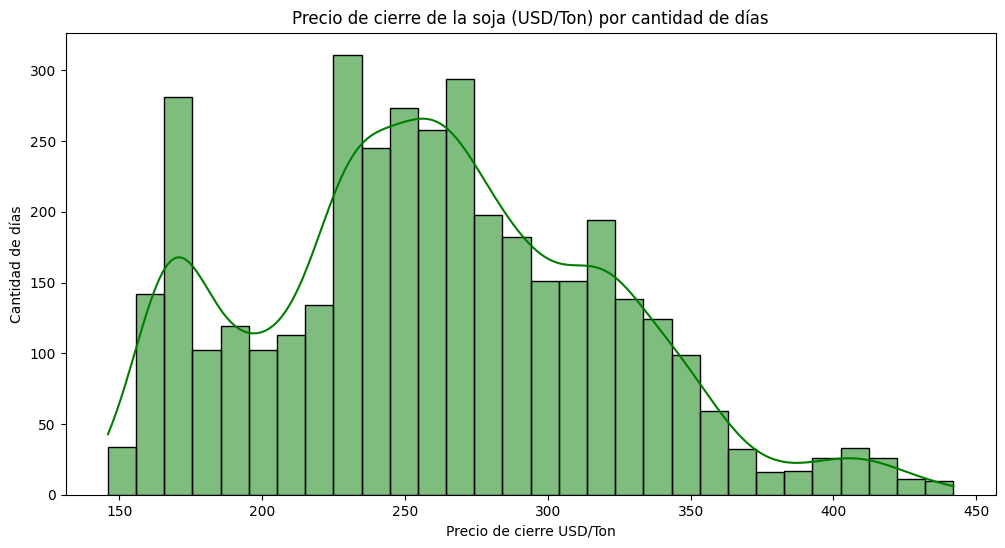

In [100]:
fig, ax = plt.subplots( figsize=(12,6) )

grafico = sns.histplot( data=df_soja, x="cierre", kde=True, color="#007d00", ax=ax )

grafico.set_xlabel("Precio de cierre USD/Ton")
grafico.set_ylabel("Cantidad de días")

plt.title("Precio de cierre de la soja (USD/Ton) por cantidad de días")

Text(0.5, 1.0, 'Valor de cierre de la tonelada de soja en USD por años')

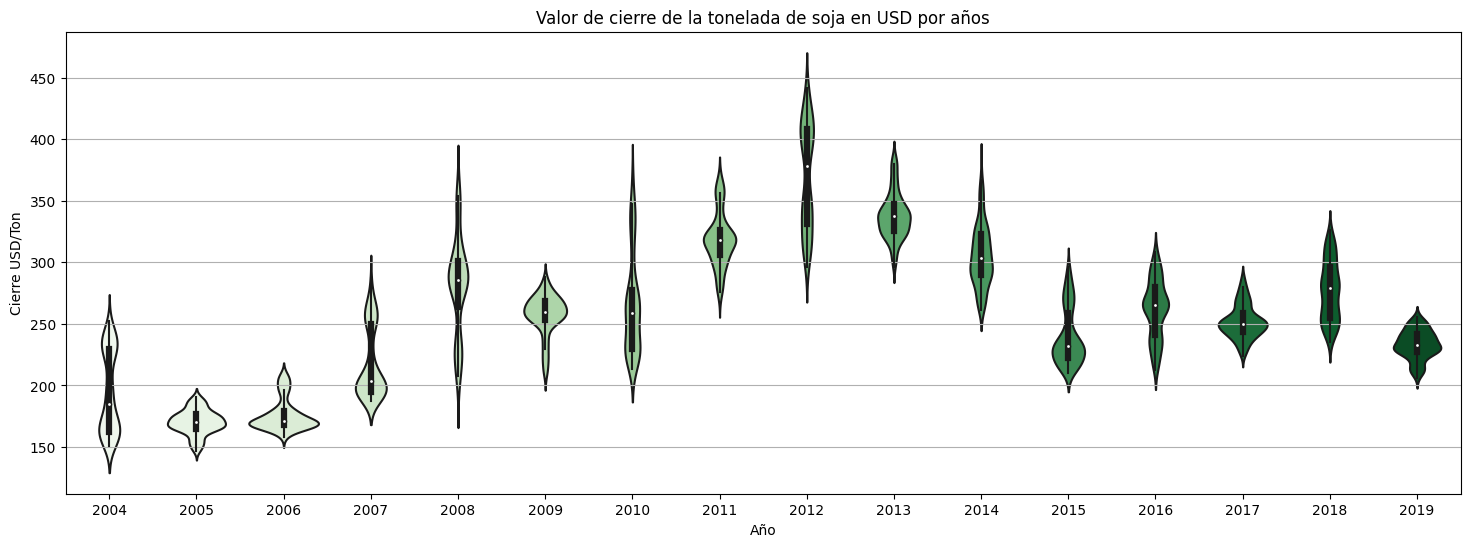

In [101]:
fig, ax = plt.subplots( figsize=(18,6) )
ax.grid()

grafico = sns.violinplot( x=df_soja.anio, y=df_soja.cierre, palette="Greens", ax=ax )

grafico.set_xlabel("Año")
grafico.set_ylabel("Cierre USD/Ton")
plt.title("Valor de cierre de la tonelada de soja en USD por años")

Creo el df datos para el heatmap, siendo el mes el index, los años las columnas y los precios de cierre promedio del mes los valores.

Text(0.5, 1.0, 'Precio de cierre de la soja (USD/Ton) según mes y año')

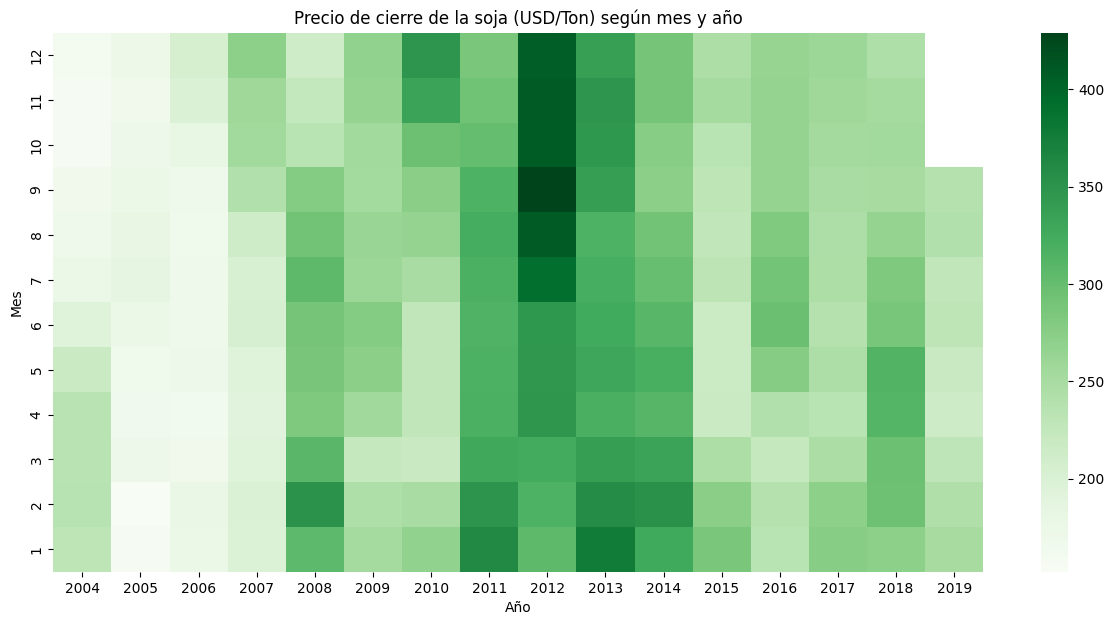

In [102]:
fig, ax = plt.subplots( figsize=(15,7) )

datos = df_soja.pivot_table( index="mes", columns="anio", values="cierre" ).sort_values( by="mes", axis=0, ascending=False )

grafico = sns.heatmap( datos, cmap="Greens", ax=ax )

grafico.set_xlabel("Año")
grafico.set_ylabel("Mes")
plt.title("Precio de cierre de la soja (USD/Ton) según mes y año")

Veo que solo tengo datos hasta septiembre de 2019.

In [103]:
datos

anio,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
mes,,,,,,,,,,,,,,,,
12,160.775000,172.404762,205.447368,271.416667,211.842105,268.547619,348.000000,285.473684,406.783333,337.584211,289.666667,246.033333,264.185000,260.315789,243.361111,NaN
11,157.295455,167.090909,198.186364,258.000000,224.425000,265.857143,332.957143,293.109524,409.376190,348.220000,290.073684,252.245000,265.309524,257.523810,252.150000,NaN
10,157.475000,170.025000,180.342857,255.350000,235.022727,255.823810,295.421053,301.025000,407.522727,344.763636,275.700000,235.333333,266.475000,253.547619,255.022727,NaN
9,166.863636,175.813636,169.000000,240.485000,277.945455,254.604545,273.686364,316.090909,429.078947,339.147619,272.313636,230.477273,266.045455,250.595238,251.500000,239.200000
8,169.409524,182.181818,167.840909,213.236364,292.100000,262.350000,264.714286,322.500000,408.686364,316.261905,292.315000,228.350000,281.068182,245.068182,266.818182,239.900000
7,176.485714,185.785714,169.452381,202.023810,305.681818,259.954545,249.557143,318.690476,391.347619,321.304545,298.304545,231.640909,290.860000,245.404762,282.976190,228.404762
6,194.190476,176.952381,168.595238,203.025000,290.050000,278.666667,228.647619,314.809524,345.750000,326.083333,309.895000,216.545455,297.325000,237.904762,287.675000,230.861111
5,218.300000,167.690476,171.476190,194.119048,286.333333,272.863158,228.500000,317.000000,346.547619,330.613636,320.365000,216.394737,277.166667,244.171429,314.309524,221.340909
4,234.315789,165.642857,163.666667,191.261111,282.285714,256.552632,227.955000,317.694737,347.382353,319.625000,310.147368,218.425000,240.047619,234.666667,311.657895,215.842105
